# Central Limit Theorem

In [1]:
# Dependencies
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import itertools
import statsmodels.api as sm;

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Generate numbers from the f-distribution
dfn=30
dfd = 10
r = stats.f.rvs(dfn, dfd, size=50000)
print(r[0:10])

[1.03943606 1.51176874 3.15982923 2.34576742 0.9965763  1.71547072
 0.45767404 0.73947119 1.65702602 0.3516741 ]


In [3]:
# Calculate characteristics
mean, var, skew, kurt = stats.f.stats(dfn, dfd, moments='mvsk')
print(f"{'Mean:':<10} {mean:0.3f}\n{'Variance:':<10} {var:0.3f}\n{'Skewness:':<10} {skew:0.3f}\n{'Kurtosis:':<10} {kurt:0.3f}")

Mean:      1.250
Variance:  0.660
Skewness:  3.488
Kurtosis:  42.505


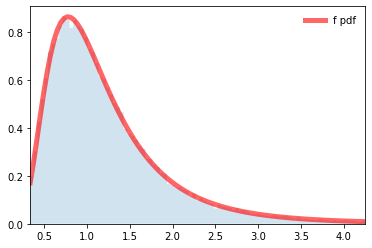

In [4]:
# Plot histogram and desity curve
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, stats.f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [5]:
from datetime import datetime
fig.savefig(f'./images/non_normal_distribution_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')

In [56]:
np.mean(r)

1.2476232628800117

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


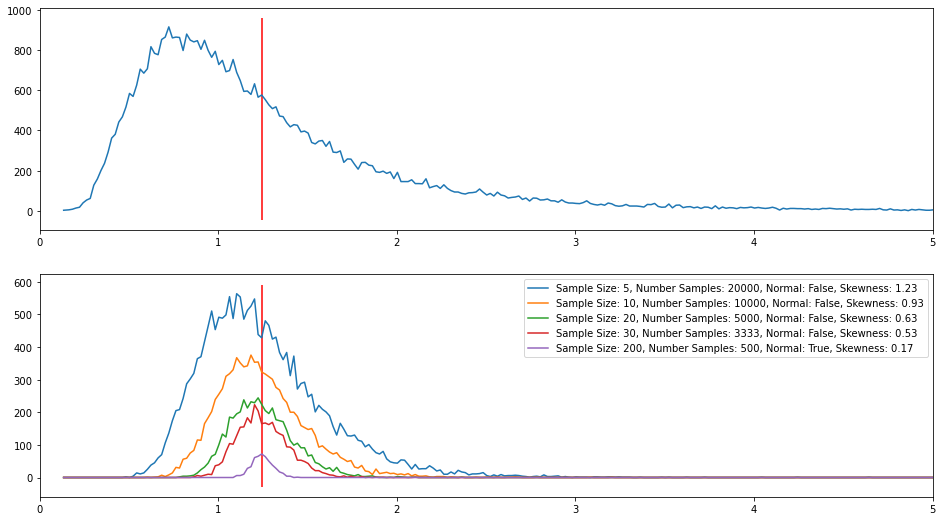

In [69]:

# Plot original F-distribution data
# --------------------------------------------------------

# Calculate properties of distribution and number of bins
min_value = np.min(r)
max_value = np.max(r)
mean_value = np.mean(r)
spread = max_value - min_value
number_bins = int(spread/0.02)

# Use 'cut' to create even bins and return intervals
bins, intervals = pd.cut(r,bins=number_bins, retbins=True)

# Create bin lables that are the midpoint of each bin range
bin_labels = [(intervals[i+1]+intervals[i])/2 for i in range(len(intervals)-1)]

# Recalculate bins but add midpoint value as label
bins_calc = pd.cut(r,bins=number_bins, labels=bin_labels)
bin_list = list(bins_calc)

# Take list of bin labels and count (like groupby but for lists)
bin_count=[]
for i in bin_labels:
    bin_count.append(bin_list.count(i))

# create plots positioned vertically relative to each other
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 9))

# plot on top plot the counts (histogram)
ax1.plot(bin_labels, bin_count)

# Plot Sample Mean Data of Various Sample sizes
# ------------------------------------------------------------


# Plot sample means of a specific sample size on the histogram
sample_sizes = [5, 10, 20, 30, 200]
number_samples = 100000

for sample_size in sample_sizes:
    # Grab sample, calculate mean, add to list
    sample_means=[]
    for _ in range(int(number_samples/sample_size)):
#     for _ in range(5000):
        sample_group = random.sample(list(r),sample_size)
        sample_mean = sum(sample_group)/len(sample_group)
        sample_means.append(sample_mean)

    # Convert sample means into categories that match the previous defined bins
    bins_ = pd.cut(sample_means, bins=intervals, labels=bin_labels)
    bin_list_ = list(bins_)

    # Take list of bin labels and count (like groupby but for lists)
    sample_count=[]
    for i in bin_labels:
        sample_count.append(bin_list_.count(i))

    # plot on bottom plot the counts (histogram)
    skew = stats.skew(sample_means)
    test = stats.shapiro(sample_means)
    normal = if test.pvalue > 0.05
    # normal = False if test.pvalue <= 0.05 else True
    sample_length = sum(sample_count)
    ax2.plot(bin_labels, sample_count, label=f"Sample Size: {sample_size}, Number Samples: {sample_length}, Normal: {normal}, Skewness: {skew:0.2f}")



# Show population mean on both charts
# -------------------------------------------------------------

# find y-axis limits and set vertical line to go from bottom to top
ax1_ylim = ax1.get_ylim()
ax1.vlines(mean_value, ax1_ylim[0], ax1_ylim[1], colors='r')
ax1.set_xlim(0,5)
ax2_ylim = ax2.get_ylim()
ax2.vlines(mean_value, ax2_ylim[0],ax2_ylim[1], colors='r')
ax2.set_xlim(0,5)
ax2.legend()



In [75]:
from datetime import datetime
fig.savefig(f'./images/central_limit_theorem_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')

### Notes:
* If you run the code above, the Sample Size of 200 may not always result in a Normal distribution.  The sample size may need decreased to 80 due to need for more samples or increased to 400 for less variance in the mean.  Not sure which factor has the greatest influence.  
* Notice that as Sample size increases, the distribution mean becomes closer to the population mean.  When sample sizes are around 200 $\pm ?$ then the means are distributed normally around the population mean.
* Skewness decreased once the distribution appears more symetrically distributed around the mean.

